<a href="https://colab.research.google.com/github/yous92/ML-Workshop/blob/main/3_Apprentissage_Supervis%C3%A9_avec_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Sklearn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##1. Regression

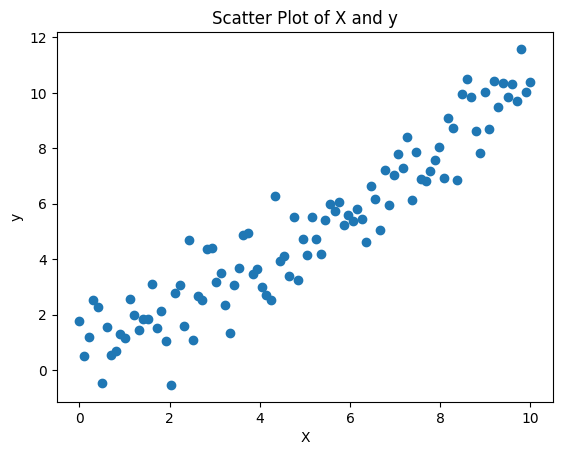

In [ ]:
np.random.seed(0)
m = 100  # Creation of 100 samples
X = np.linspace(0, 10, m).reshape(m, 1)  # Generates m equally spaced values between 0 and 10
y = X + np.random.randn(m, 1)

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of X and y')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression  # Import the LinearRegression class from the linear_model sub-package


In [ ]:
model = LinearRegression()  # Implements the least squares method
model.fit(X, y)  # Train the model
model.score(X, y)  # Evaluate with the R^2 coefficient of determination from the least squares method


0.8881140743377214

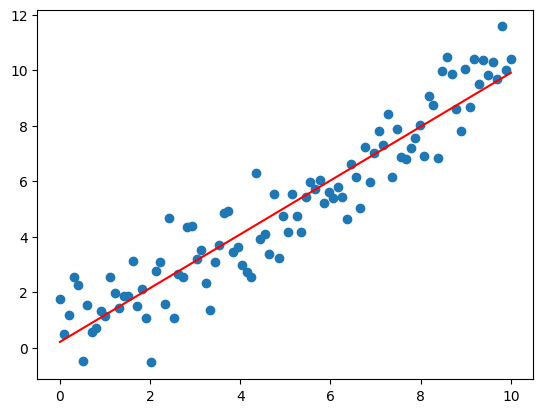

In [ ]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), c='red')

If we modify the relationship to \( y = x^2 \), the linear regression model will not fit the data well because it assumes a linear relationship. Although the model may fit the data poorly, it has effectively learned from the data; however, it is not the right model for this scenario. Therefore, we need to choose a different model that can handle non-linear relationships, such as a Support Vector Machine (SVM) with a non-linear kernel.



##2. Classification

The Titanic dataset is a well-known dataset used for machine learning and data analysis, particularly in the context of classification problems. It is based on the passengers aboard the RMS Titanic, which sank on its maiden voyage in 1912. The dataset is often used to predict whether a passenger survived or did not survive the disaster.

## Step 1: Data Gathering
The first step is to read the data that we will use as input. For this example, we will be using the Titanic dataset. For loading the dataset, we would use the pandas library.

- 891 Observations
- The 9 features are Passenger Id, Pclass, Name, Sex, Age, Ticket, Fare, Cabin, and Embarked.
- Target label (survived: 0 = did not survive, 1 = did survive)

In [ ]:
#Import initial libraries and dataset
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Data pre-processing

- **Filling Missing values**
We check the number of missing values for each feature using the “isnull” function. When we call the “sum” function along with isnull, the sum of missing data in each column is the output.

In [ ]:
#Finding the number of missing values for each feature
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#finding and replacing the missing values with mean of non-null values of age
df['Age']=df['Age'].replace(np.NaN,df['Age'].mean())
df['Age'][:10]

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
5,29.699118
6,54.000000
7,2.000000
8,27.000000
9,14.000000


- **Encoding of Categorical data**
Then we use a basic “search and replace” strategy to encode the categorical data. “Male” and “female” are the categorical values in the column “Sex”. The male is replaced with 0 while the female is replaced with 1.



In [ ]:
#encoding categorical data to numerical:
Gender = {'Sex':{'male': 0, 'female': 1}}
df = df.replace(Gender)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


- **Removing Irrelevant data**
The irrelevant features in the data can decrease the accuracy of the model and make it learn based on irrelevant features. These features can be removed automatically or manually.

Features like name, Passenger id, ticket, the cabin does not provide any extra details for the target variables. Therefore, we remove these columns by using drop functions

In [ ]:
df.drop(['Name', 'PassengerId', 'Ticket', 'Embarked', 'Cabin', 'SibSp','Parch','Fare'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


Note that different methods for preparing data are available, such as one-hot encoder, standard scaler, and so on.

## Step 3: Decide on a model.

As the target variable is categorical in nature, we would perform a classification task with KNN Algorithm

## Step 4: Split the Dataset.

First, we will split the dataset into inputs and target. Input will be every column except ‘Survived’ because it will be the target variable. For this purpose, we will be using pandas “drop” function.

In [ ]:
# Split the dataset into input and target features
X=df.drop('Survived', axis=1)
y=df.Survived

In [ ]:
# Split the input and target features into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Step 5: Train the Model.

The next step is to train the model.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# create knn classifier
knn = KNeighborsClassifier(n_neighbors = 7)
#fit the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

## Step 6: Evaluation

The model is now ready to generate predictions based on the test data. We use the “predict” function to make predictions.

In [ ]:
print('train score:', knn.score(X_train, y_train))
print('test score:', knn.score(X_test, y_test))

train score: 0.8314606741573034
test score: 0.746268656716418


In [ ]:
#make prediction
y_pred=knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
knn_accuracy = accuracy_score(y_test, y_pred)
print('Accuarcy',knn_accuracy*100)

Accuarcy 74.6268656716418


A confusion matrix could be used to understand the performance of a classification model efficiently. It demonstrates how our model becomes confused when making predictions.



In [ ]:
#Confusion matrix
print(confusion_matrix(y_test,y_pred))

[[129  24]
 [ 44  71]]



- **True Negatives (TN):** 129 — The number of instances correctly predicted as negative.
- **False Positives (FP):** 24 — The number of instances incorrectly predicted as positive.
- **False Negatives (FN):** 44 — The number of instances incorrectly predicted as negative.
- **True Positives (TP):** 71 — The number of instances correctly predicted as positive.


## Survival Prediction


In [ ]:
def Survived(model, pclass=3, sex=1, age=22):
  x = np.array([pclass, sex, age]).reshape(1, 3)
  print(model.predict(x))
  print(model.predict_proba(x))

In [ ]:
Survived(knn)

[0]
[[0.71428571 0.28571429]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## 4. Exercise
Write code to find the best value for the n_neighbors parameter for the KNeighborsClassifier model.

In sklearn, this can be done using the GridSearchCV class. However, it can also be useful to know how to write such a search code manually.

6
0.7611940298507462


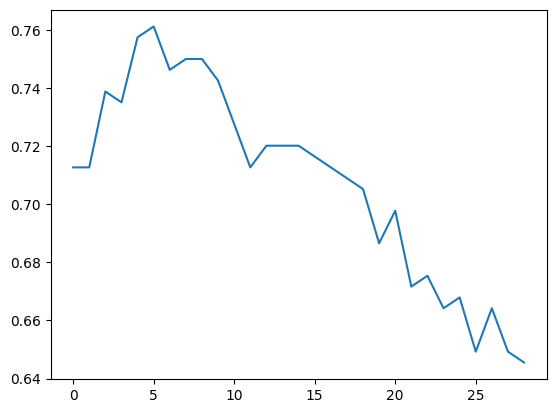

In [ ]:
# SOLUTION
score = []
best_k = 1
best_score = 0

for k in range(1, 30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    score.append(model.score(X_test, y_test))

    if best_score < model.score(X_test, y_test):
        best_k = k
        best_score = model.score(X_test, y_test)

print(best_k)
print(best_score)
plt.plot(score)

## 2. Validation Set and Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model = KNeighborsClassifier()
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy') #cv=5 : nb split in the cross validation

array([0.776     , 0.784     , 0.728     , 0.72580645, 0.75      ])

Best k: 2
Best Validation Score: 0.781625806451613


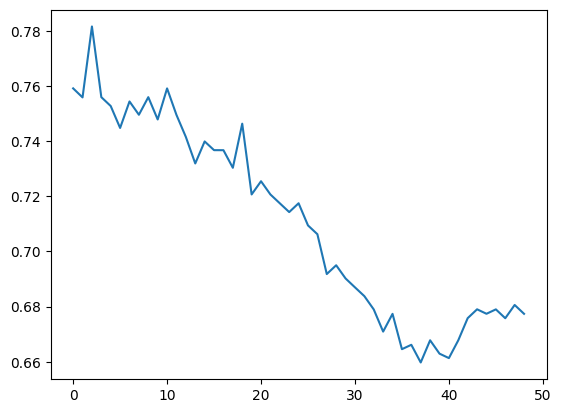

In [ ]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)
best_k_index = np.argmax(val_score)

# Print the best k and the corresponding validation score
print("Best k:", best_k_index)
print("Best Validation Score:", val_score[best_k_index])
plt.plot(val_score)

##4. GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV



*  Euclidean Distance
d = √((x₂ - x₁)² + (y₂ - y₁)²)
*  Manhattan Distance
d = |x₂ - x₁| + |y₂ - y₁|



In [ ]:
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.7832387096774195
{'metric': 'manhattan', 'n_neighbors': 3}


In [ ]:
model = grid.best_estimator_
model.score(X_test, y_test) #in real file

0.7388059701492538